In [1]:
from draw import random_shape_gen
from mrf_3d import MRF, Image

In [2]:
from sklearn.mixture import GaussianMixture

In [3]:
# standard libs
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import math
from skimage import io, img_as_float, color

In [4]:
test_file = './draw/scrot/0.png'

[]

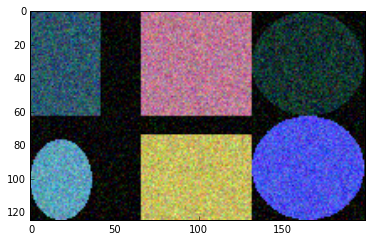

In [113]:
test_img = Image(filename=test_file,pepper=True,scale=1)
plt.imshow(test_img._data)
plt.plot()

In [76]:
test_img[75,50]

array([ 0.,  0.,  0.])

In [57]:
test_truth = random_shape_gen.MultiShapeHolder(test_img.width,test_img.height)
test_truth.get_truth('./draw/scrot/0.txt')

In [58]:
print(test_truth.get_shape(18,25))

Rectangle centered at [21, 93] (x,y),
	 width/height [42, 62]
	 color (45, 86, 106)


In [59]:
k = len(test_truth.shapes)
k

6

In [114]:
test_gmm = GaussianMixture(k+1,'full',init_params='random',verbose=1)

In [115]:
d2_array = np.reshape(np.ravel(test_img._data),(test_img._data.shape[0]*test_img._data.shape[1],test_img._data.shape[2]))

In [116]:
test_gmm.fit(d2_array)

Initialization 0
  Iteration 0
Initialization converged: True


GaussianMixture(covariance_type='full', init_params='random', max_iter=100,
        means_init=None, n_components=7, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=1,
        verbose_interval=10, warm_start=False, weights_init=None)

In [117]:
test_gmm.means_

array([[ 0.32717103,  0.33044786,  0.37880521],
       [ 0.32250824,  0.32649445,  0.38187935],
       [ 0.32026148,  0.32469942,  0.38610973],
       [ 0.31972944,  0.32495265,  0.3845091 ],
       [ 0.32234939,  0.32858198,  0.38522819],
       [ 0.32447156,  0.32865568,  0.38432607],
       [ 0.31997095,  0.32685147,  0.38540383]])

In [118]:
test_gmm.covariances_

array([[[ 0.09725625,  0.06339145,  0.04555775],
        [ 0.06339145,  0.06636437,  0.04120994],
        [ 0.04555775,  0.04120994,  0.09326955]],

       [[ 0.09540098,  0.06294658,  0.0450312 ],
        [ 0.06294658,  0.06565792,  0.04085354],
        [ 0.0450312 ,  0.04085354,  0.09616407]],

       [[ 0.09431325,  0.06138769,  0.04496667],
        [ 0.06138769,  0.06432494,  0.04110304],
        [ 0.04496667,  0.04110304,  0.09754466]],

       [[ 0.09433467,  0.06139625,  0.04512428],
        [ 0.06139625,  0.06461713,  0.0412281 ],
        [ 0.04512428,  0.0412281 ,  0.09698599]],

       [[ 0.0947513 ,  0.06251792,  0.04432728],
        [ 0.06251792,  0.06576949,  0.0407802 ],
        [ 0.04432728,  0.0407802 ,  0.09679777]],

       [[ 0.09553377,  0.06301751,  0.04459732],
        [ 0.06301751,  0.06584293,  0.04047467],
        [ 0.04459732,  0.04047467,  0.09635123]],

       [[ 0.09415551,  0.06181318,  0.04447599],
        [ 0.06181318,  0.06514358,  0.04112476],
        

In [119]:
test_mrf = MRF(test_img,test_gmm.means_,test_gmm.covariances_,verbose=True)

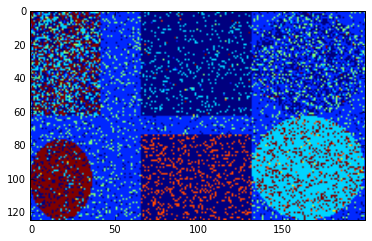

In [120]:
plt.imshow(test_mrf.labels)

In [135]:
test_mrf.icm()

icm
THE COUNTER: 0
593753.7174352257
THE COUNTER: 1
93276.09448271163
THE COUNTER: 2
27727.92529862025
THE COUNTER: 3
16222.021059624618
THE COUNTER: 4
9072.430937615572
THE COUNTER: 5
5401.851264819037
THE COUNTER: 6
4347.472387185437
THE COUNTER: 7
4434.834591869963
THE COUNTER: 8
2713.050653673592
THE COUNTER: 9
2673.684657840291
took 10 iterations


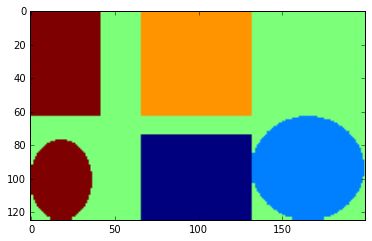

In [66]:
plt.imshow(test_mrf.labels)

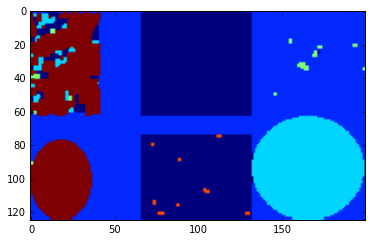

In [136]:
plt.imshow(test_mrf.labels)

In [41]:
test_mrf.labels[20,20]

4

In [44]:
test_mrf.labels[50,175]

4

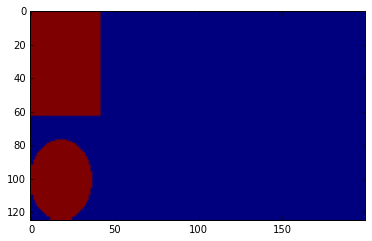

In [87]:
dubz = test_mrf.labels == 5
plt.imshow(dubz)

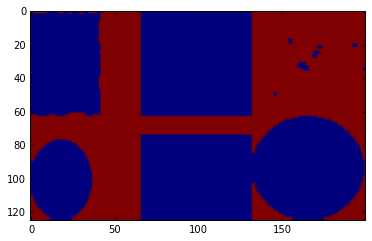

In [246]:
dubz_noisy = test_mrf.labels == 1
plt.imshow(dubz_noisy)

In [82]:
from skimage import measure

2


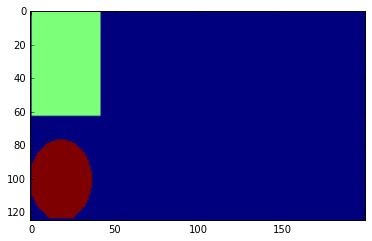

In [109]:
labeling, nk = measure.label(ndimage.morphology.binary_closing(test_mrf.labels == 5),return_num=True)
plt.imshow(labeling)
print(nk)

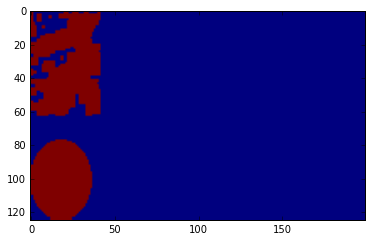

In [152]:
plt.imshow(ndimage.morphology.binary_fill_holes(dubz_noisy))

5


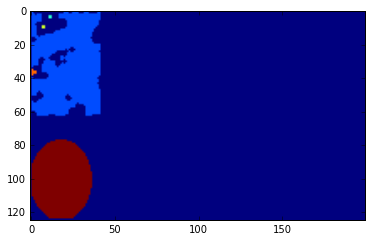

In [153]:
noisy_labeling, noisy_nk = measure.label(ndimage.morphology.binary_closing(dubz_noisy),return_num=True)
plt.imshow(noisy_labeling)
print(noisy_nk)

In [161]:
tru_ks = [k for k in range(1,noisy_nk+1) if np.sum(noisy_labeling==k) > 100]
tru_ks

[1, 5]

In [218]:
np.max(noisy_labeling)

5

In [95]:
from scipy import ndimage

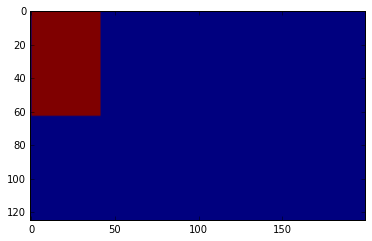

In [110]:
examine = ndimage.morphology.binary_closing(labeling==1)
plt.imshow(examine)

In [111]:
ndimage.measurements.center_of_mass(examine)

(31.5, 21.0)

In [112]:
np.sum(examine,axis=1)

array([ 0, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41,
       41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41,
       41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41,
       41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0])

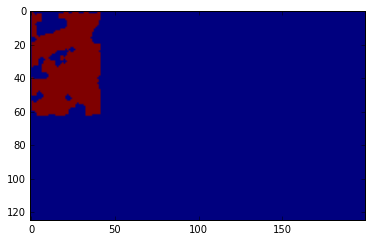

In [163]:
examine_noisy = noisy_labeling == tru_ks[0]
plt.imshow(examine_noisy)

In [164]:
ndimage.measurements.center_of_mass(examine_noisy)

(32.904572564612323, 22.113320079522861)

In [169]:
pot_h, pot_w = max(np.sum(examine_noisy,axis=0)), max(np.sum(examine_noisy,axis=1))
cntr = ndimage.measurements.center_of_mass(examine_noisy)

In [177]:
import math

In [204]:
x, y = np.meshgrid(np.arange(examine_noisy.shape[1]), np.arange(examine_noisy.shape[0]))
x -= math.floor(cntr[1])
y -= math.floor(cntr[0])
eliptical_mask = ((x * x)/(pot_w**2)*4 + (y * y)/(pot_h**2)*4 < 1)
eliptical_mask.shape

(125, 200)

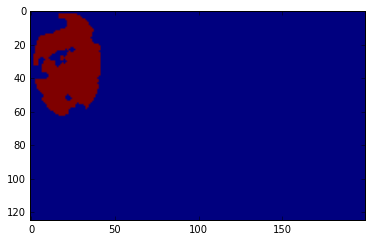

In [186]:
plt.imshow(examine_noisy*eliptical_mask)

In [199]:
# bounded_box = examine_noisy[)]
bot, top = max(0,math.floor(cntr[0]-pot_h/2)),min(math.floor(cntr[0]+pot_h/2),examine_noisy.shape[0])
left, right = max(0,math.floor(cntr[1]-pot_w/2)),min(math.floor(cntr[1]+pot_w/2),examine_noisy.shape[1])

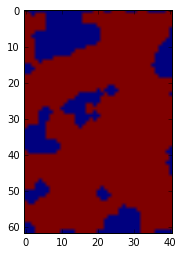

In [200]:
bounded_box = examine_noisy[bot:top,left:right]
plt.imshow(bounded_box)

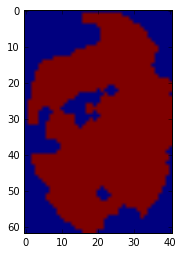

In [207]:
bounded_oval = (examine_noisy*eliptical_mask)[bot:top,left:right]
plt.imshow(bounded_oval)

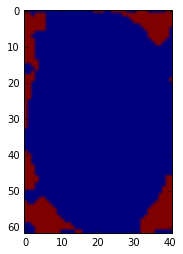

In [209]:
plt.imshow(bounded_box^bounded_oval)

In [211]:
np.sum(bounded_box^bounded_oval)

368

In [213]:
pot_w*pot_h - np.sum(eliptical_mask)

545

In [216]:
np.sum(bounded_box^bounded_oval)/ (pot_w*pot_h - np.sum(eliptical_mask)) > .5 # true means rect

True

In [262]:
def get_bounds(examine):
	pot_h, pot_w = max(np.sum(examine,axis=0)), max(np.sum(examine,axis=1))
	cntr = ndimage.measurements.center_of_mass(examine)
	return cntr, pot_h, pot_w

# input: (potentially) binary mask from a label (bin_mask)
def get_shapes_of_regions(bin_mask):
	labeling, nk = measure.label(ndimage.morphology.binary_closing(bin_mask),return_num=True)
	tor = []
	if nk == 0: return tor
	# check that this isnt background -.-
	_, pot_h, pot_w = get_bounds(bin_mask)
	tot_h, tot_w = bin_mask.shape[0], bin_mask.shape[1]
	if all([pot_h/tot_h >= .75, pot_w/tot_w >= .75]): return tor
	tru_ks = [k for k in range(1,nk+1) if np.sum(labeling==k) > 200] # get rid of things that are not major shapes..
	for k in tru_ks:

		examine = labeling == k
		cntr, pot_h, pot_w = get_bounds(examine)
		bot, top = max(0,math.floor(cntr[0]-pot_h/2)),min(math.floor(cntr[0]+pot_h/2),examine.shape[0])
		left, right = max(0,math.floor(cntr[1]-pot_w/2)),min(math.floor(cntr[1]+pot_w/2),examine.shape[1])

		x, y = np.meshgrid(np.arange(examine.shape[1]), np.arange(examine.shape[0]))
		x -= math.floor(cntr[1])
		y -= math.floor(cntr[0])
		elliptical_mask = ((x * x)/(pot_w**2)*4 + (y * y)/(pot_h**2)*4 < 1)

		bounded_box = examine[bot:top,left:right]
		bounded_oval = (examine*elliptical_mask)[bot:top,left:right]
		print('shape',k)
		if np.sum(bounded_box^bounded_oval)/ (pot_w*pot_h - np.sum(elliptical_mask)) > .5:
			shape_type = 'Rectangle'
		else:
			shape_type = 'Ellipse'
		# print(left,top,right,bot)
		tor.append(random_shape_gen.Shape(left,top,right,bot,shape_type))
	return tor

In [248]:
ss = get_shapes_of_regions(dubz_noisy)
len(ss)

0

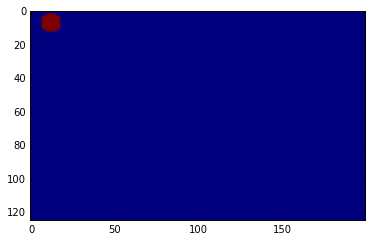

In [244]:
plt.imshow(np.flipud(ss[0].get_mask(test_img.height,test_img.width)))

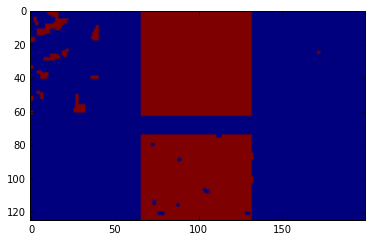

In [245]:
plt.imshow(dubz_noisy)

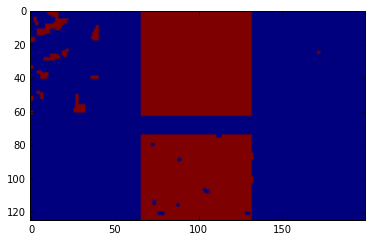

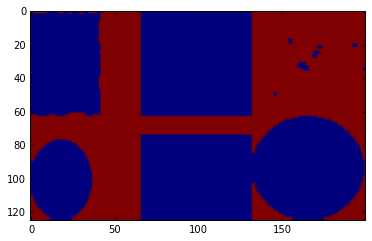

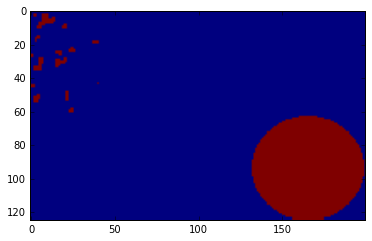

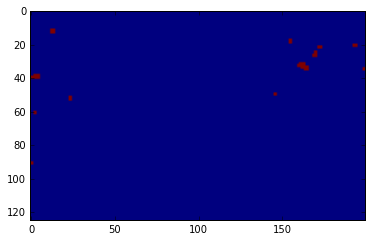

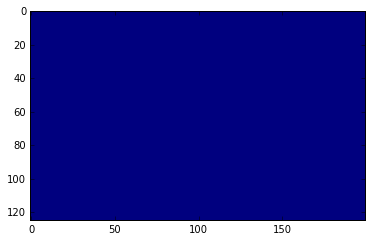

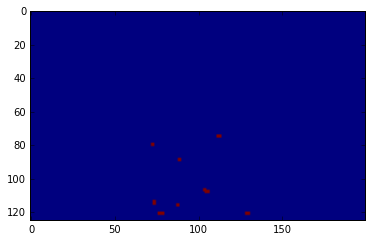

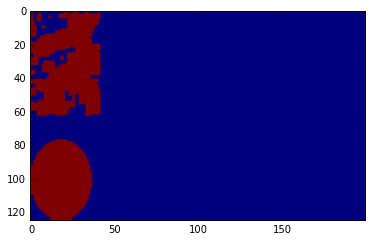

In [251]:
for label in range(0,np.max(test_mrf.labels)+1):
    dub = test_mrf.labels == label
    plt.imshow(dub)
    plt.show()

shape 1
shape 2
shape 15


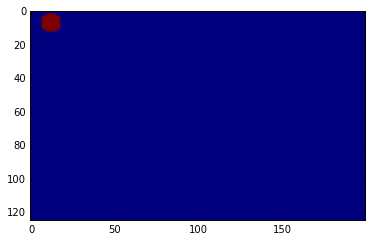

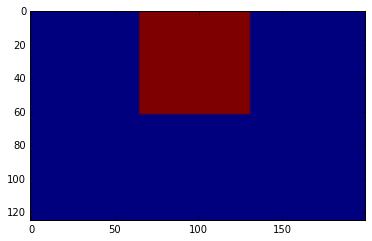

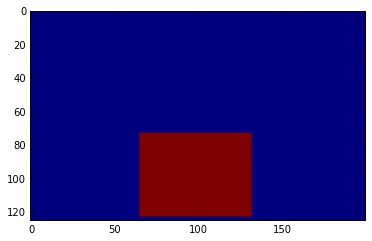

shape 16


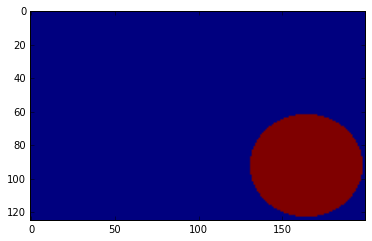

shape 1
shape 5


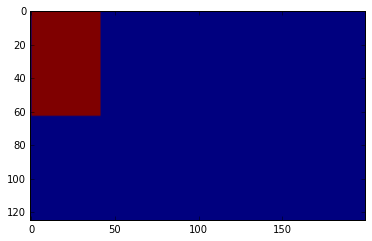

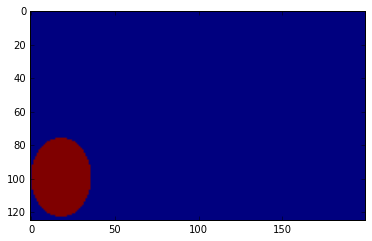

In [256]:
for label in range(0,np.max(test_mrf.labels)+1):
    dub = test_mrf.labels == label
    ss = get_shapes_of_regions(dub)
#     print(label,len(ss))
    if len(ss) > 0:
        for s in ss:
            plt.imshow(np.flipud(s.get_mask(test_img.height,test_img.width)))
            plt.show()

shape 2
shape 15
shape 16
shape 1
shape 5


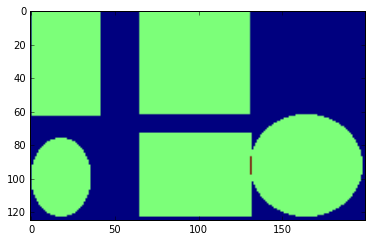

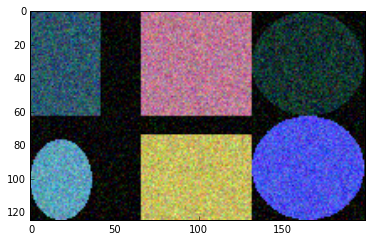

In [263]:
to_display = np.zeros((test_img.height,test_img.width))
for label in range(0,np.max(test_mrf.labels)+1):
    dub = test_mrf.labels == label
    ss = get_shapes_of_regions(dub)
#     print(label,len(ss))
    if len(ss) > 0:
        for s in ss:
            to_display += np.flipud(s.get_mask(test_img.height,test_img.width))
#             plt.show()
plt.imshow(to_display)
plt.show()
plt.imshow(test_img._data)
plt.show()